<a href="https://colab.research.google.com/github/Analytical-Sage/Analytical-Sage/blob/main/Completed_FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
# Get the number of rows and columns
num_rows, num_columns = df.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 1898 rows and 9 columns.


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      

#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
# No missing values found because all columns have non-null values. But the following is the code to check the missing values
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
# Calculate the statistical summary
summary = df.describe()
print(summary)

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
# Count the number of orders not rated
num_orders_not_rated = df['rating'].isnull().sum()
print(f'The number of orders not rated is {num_orders_not_rated}.')

The number of orders not rated is 0.


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

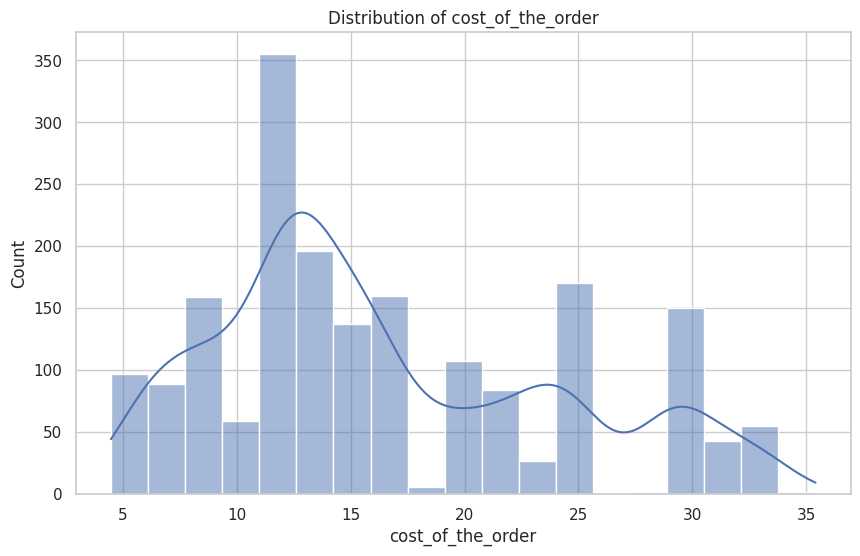

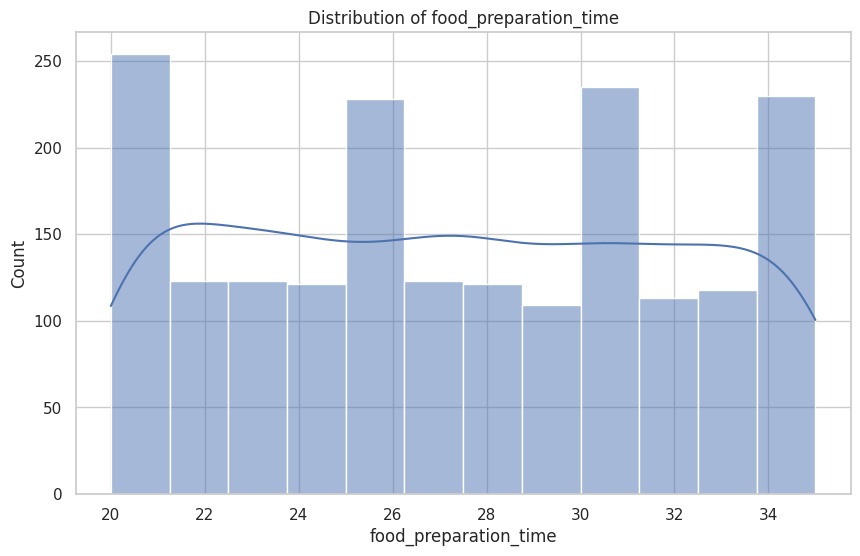

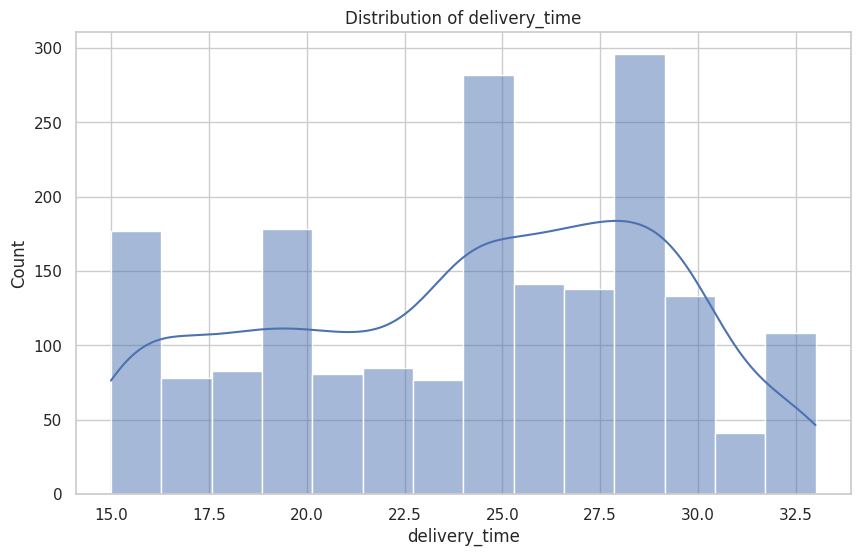

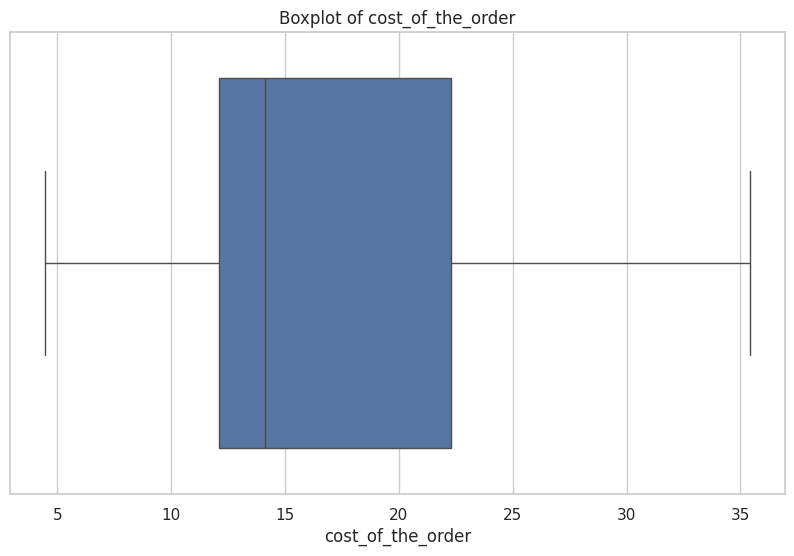

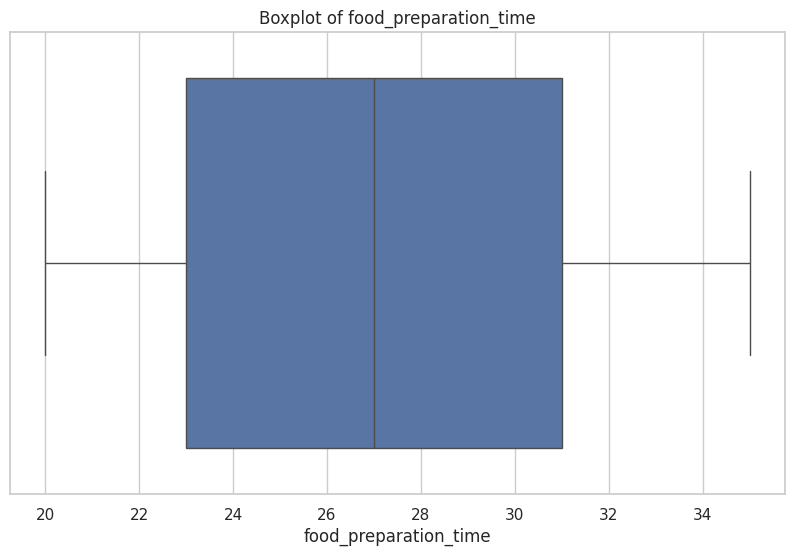

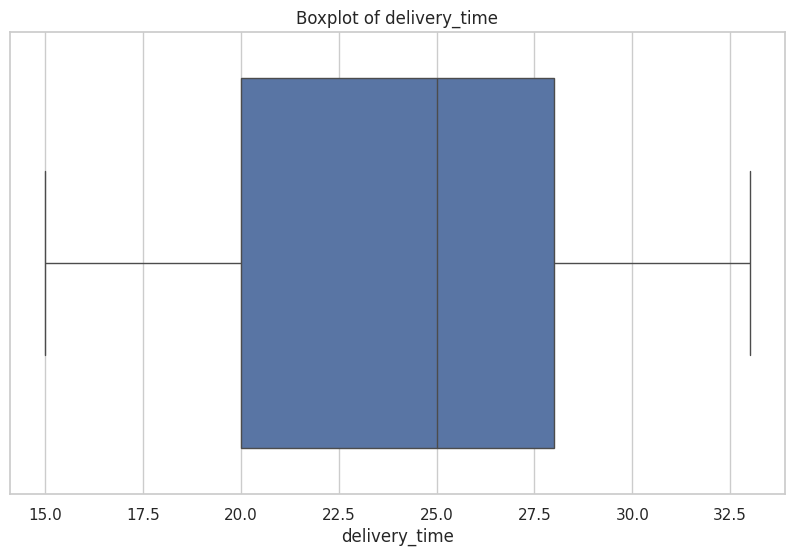

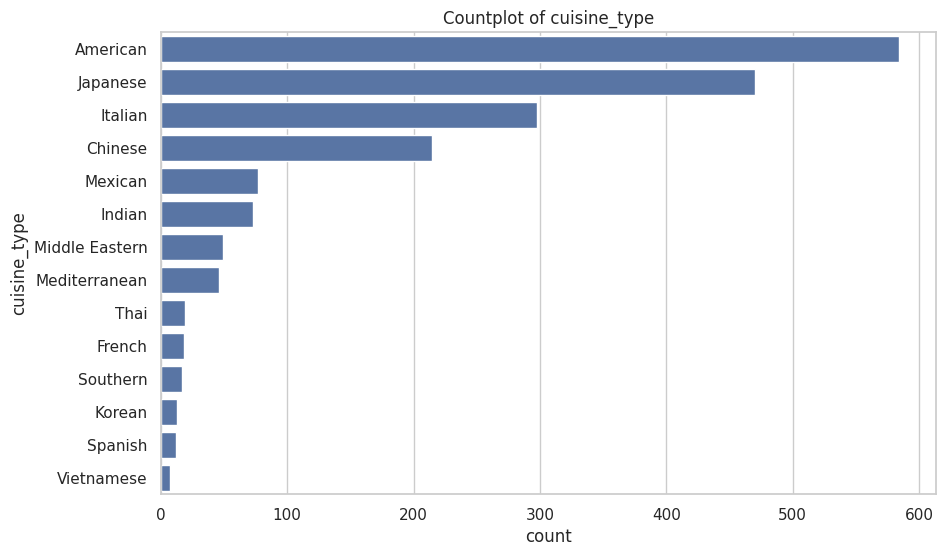

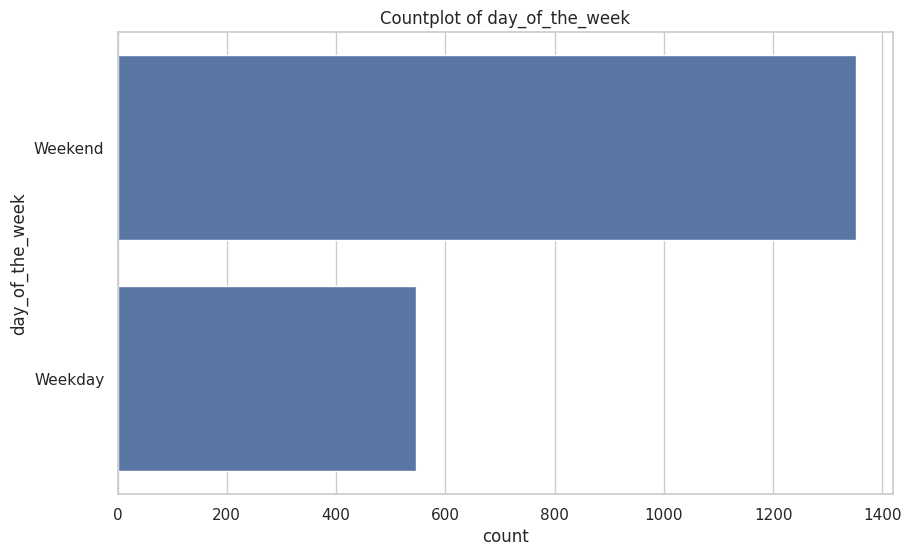

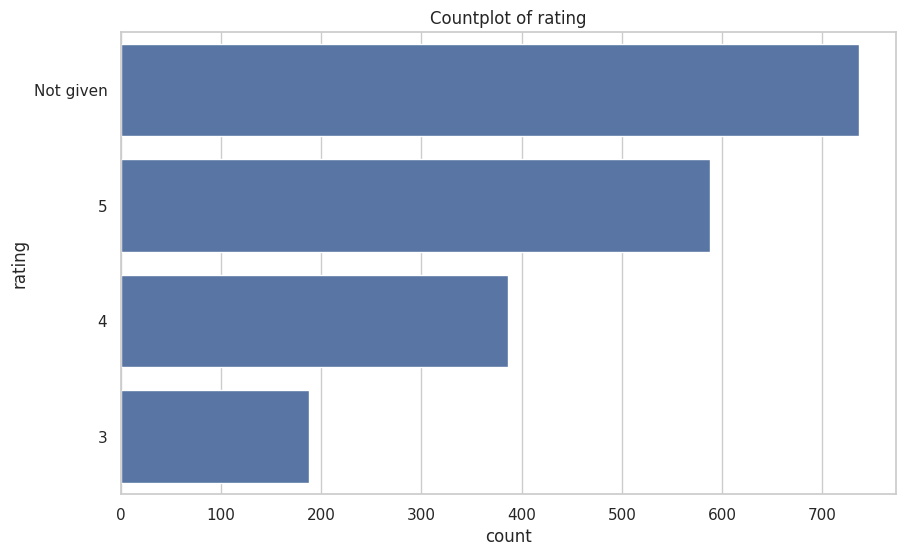

In [ ]:

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histograms for numerical variables
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplots for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Countplots for categorical variables
categorical_cols = ['cuisine_type', 'day_of_the_week', 'rating']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Group by restaurant_name and count the number of orders
restaurant_orders = df.groupby('restaurant_name').size().reset_index(name='num_orders')

# Sort the restaurants by the number of orders in descending order
restaurant_orders = restaurant_orders.sort_values(by='num_orders', ascending=False)

# Get the top 5 restaurants
top_5_restaurants = restaurant_orders.head(5)

# Print the top 5 restaurants
print(top_5_restaurants)



               restaurant_name  num_orders
136                Shake Shack         219
153          The Meatball Shop         132
21           Blue Ribbon Sushi         119
20   Blue Ribbon Fried Chicken          96
109                       Parm          68


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter for weekends
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Count the occurrences of each cuisine type on weekends
cuisine_counts = weekend_data['cuisine_type'].value_counts().reset_index()
cuisine_counts.columns = ['cuisine_type', 'number_of_orders']

# Get the most popular cuisine type
most_popular_cuisine = cuisine_counts.iloc[0]

# Print the most popular cuisine
print(f"The most popular cuisine on weekends is {most_popular_cuisine['cuisine_type']} with {most_popular_cuisine['number_of_orders']} orders.")


The most popular cuisine on weekends is American with 415 orders.


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Filter the dataset for orders that cost more than $20
expensive_orders = df[df['cost_of_the_order'] > 20]

# Calculate the percentage
percentage_expensive_orders = (len(expensive_orders) / len(df)) * 100

print(f"{percentage_expensive_orders:.2f}% of the orders cost more than $20.")

29.24% of the orders cost more than $20.


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

print(f"The mean order delivery time is {mean_delivery_time:.2f} minutes.")

The mean order delivery time is 24.16 minutes.


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Group by customer_id and count the number of orders for each customer
customer_order_counts = df['customer_id'].value_counts().reset_index()
customer_order_counts.columns = ['customer_id', 'number_of_orders']

# Get the top 3 most frequent customers
top_3_customers = customer_order_counts.head(3)

print(top_3_customers)

   customer_id  number_of_orders
0        52832                13
1        47440                10
2        83287                 9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


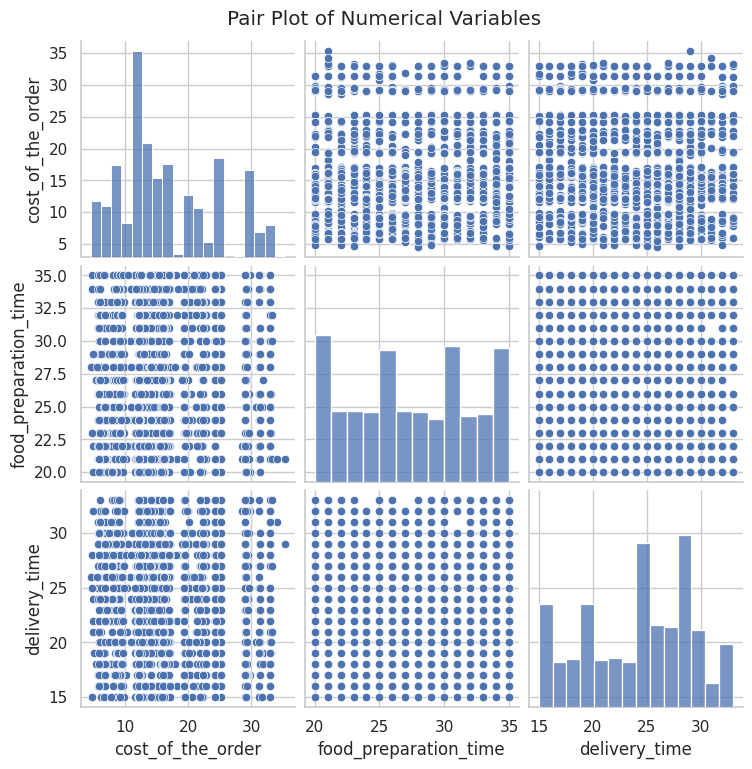

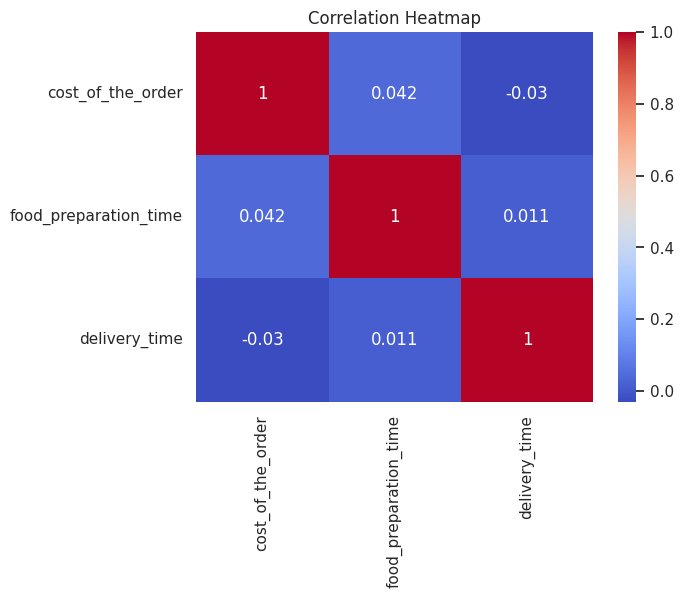

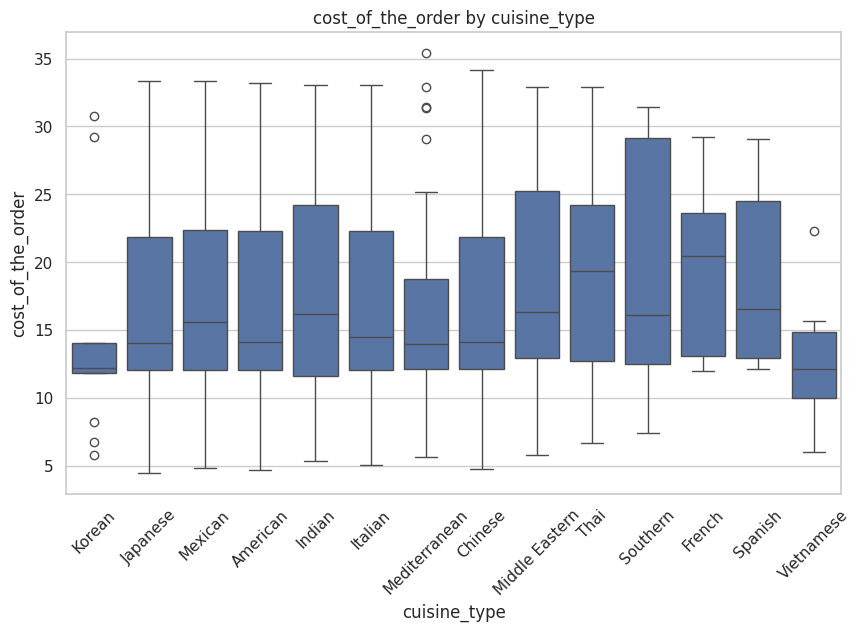

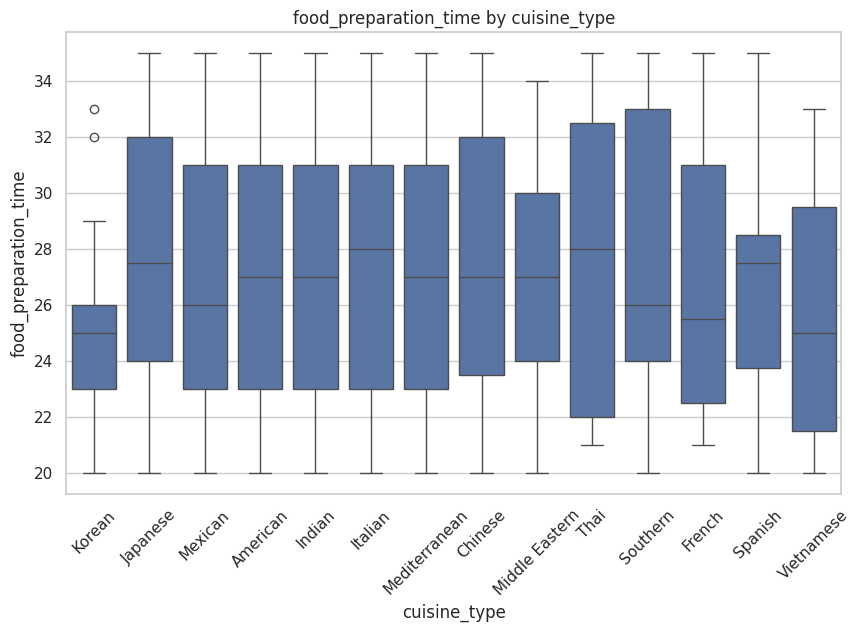

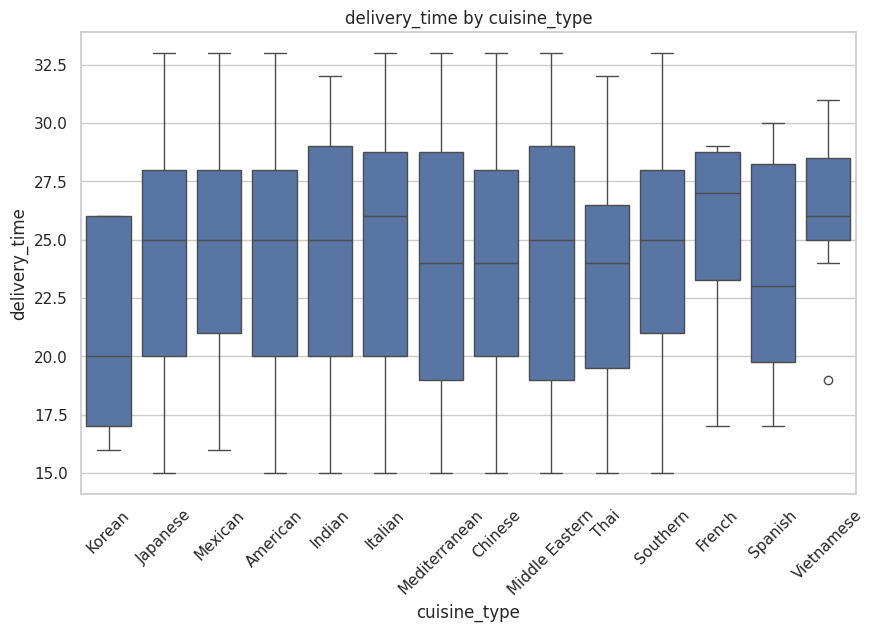

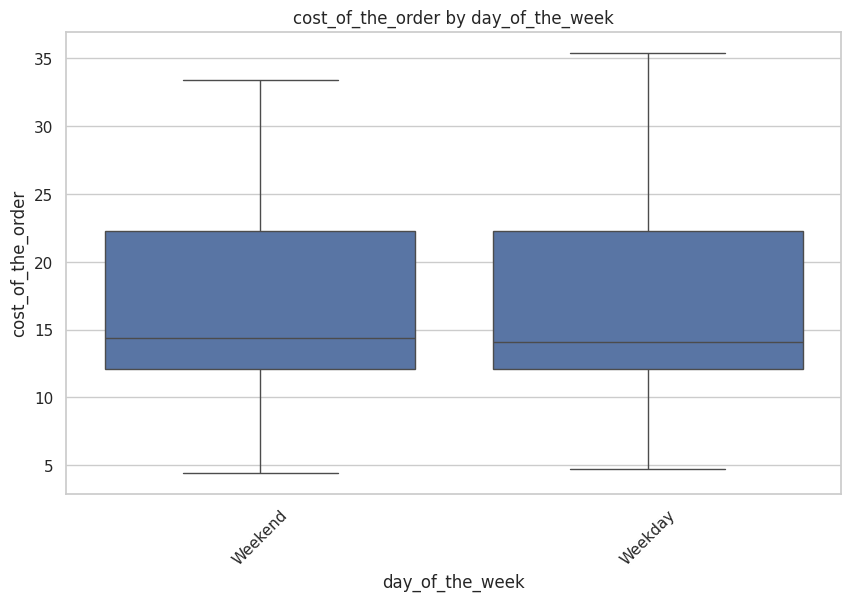

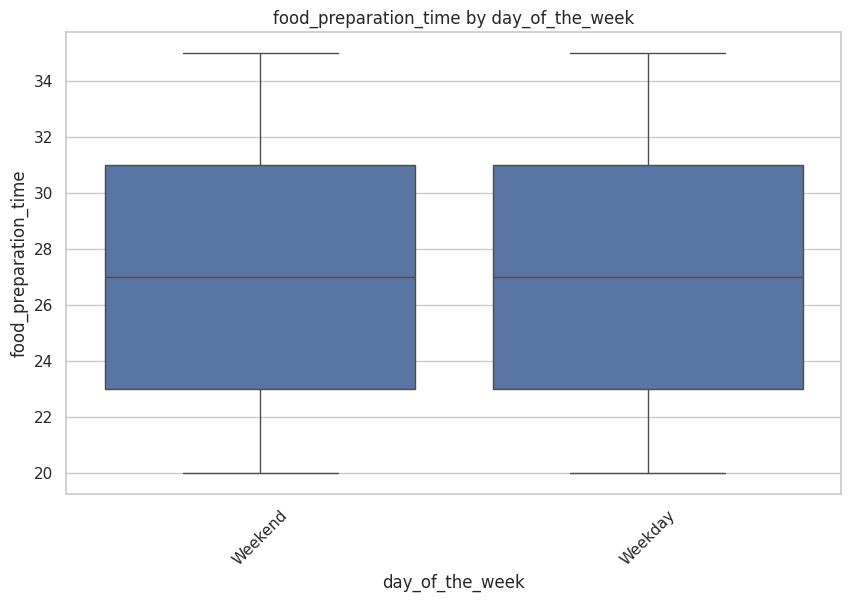

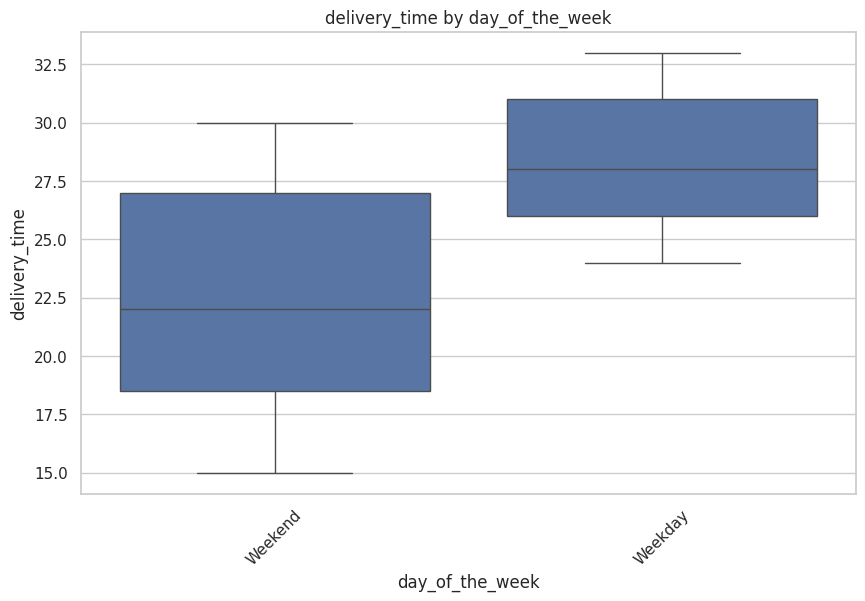

In [ ]:
# Convert 'rating' to numerical where possible
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Pair Plot
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplots to explore relationship between numerical and categorical variables
categorical_vars = ['cuisine_type', 'day_of_the_week']
numerical_vars = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

for cat_var in categorical_vars:
    for num_var in numerical_vars:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_var, y=num_var, data=df)
        plt.title(f'{num_var} by {cat_var}')
        plt.xticks(rotation=45)
        plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter out rows where rating is 'Not given'
df = df[df['rating'] != 'Not given']

# Convert rating column to numeric
df['rating'] = pd.to_numeric(df['rating'])

# Group by restaurant_name and calculate count and average rating
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# Filter restaurants that meet the criteria
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

print(eligible_restaurants)

               restaurant_name  count      mean
20   Blue Ribbon Fried Chicken     64  4.328125
21           Blue Ribbon Sushi     73  4.219178
136                Shake Shack    133  4.278195
153          The Meatball Shop     84  4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Define a function to calculate the commission based on order cost
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the function to calculate the commission for each order
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Calculate the total revenue
total_revenue = df['commission'].sum()

print(f"The total revenue generated by the company is ${total_revenue:.2f}.")

The total revenue generated by the company is $6166.30.


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate total delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the number of orders that take more than 60 minutes
num_orders_over_60 = df[df['total_delivery_time'] > 60].shape[0]

# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the percentage of orders that take more than 60 minutes
percentage_over_60 = (num_orders_over_60 / total_orders) * 100

print(f"The percentage of orders that take more than 60 minutes to deliver is {percentage_over_60:.2f}%.")

The percentage of orders that take more than 60 minutes to deliver is 10.54%.


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculate mean delivery time for weekdays and weekends
mean_delivery_time_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_time_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print(f"The mean delivery time on weekdays is {mean_delivery_time_weekday:.2f} minutes.")
print(f"The mean delivery time on weekends is {mean_delivery_time_weekend:.2f} minutes.")

The mean delivery time on weekdays is 28.34 minutes.
The mean delivery time on weekends is 22.47 minutes.


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

Conclusions:

Total Revenue: The company generated a solid revenue of $6,166.30, which shows that the business is doing well overall. However, there’s always room for improvement.

Delivery Times: About 10.54% of orders take over 60 minutes to deliver. This might frustrate some customers and lead to negative experiences, especially during busy times.

Weekday vs. Weekend Delivery: The mean delivery time is longer on weekdays (28.34 minutes) compared to weekends (22.47 minutes). This suggests that weekdays are busier, which can slow down delivery.

Order Costs: Nearly 30% of orders cost more than $20. This shows there’s a healthy market for higher-priced items, but there’s potential to increase average order values further.

Popular Cuisines: American cuisine is the most popular on weekends with 415 orders, indicating strong customer preference that could be leveraged for promotions or special offerings.

### Recommendations:


Enhance Delivery Efficiency:

Since some deliveries take longer than an hour, consider ways to streamline the delivery process. This could include optimizing routes or possibly hiring more delivery staff during peak times to ensure timely deliveries.

Focus on Customer Experience:

With the current average delivery time being over 28 minutes on weekdays, communicating estimated delivery times clearly to customers could help manage expectations and improve satisfaction.
Offering incentives for customers who order during slower hours might also help balance demand.

Promote High-Value Orders:

Since 29.24% of orders exceed $20, consider creating combo deals or promotions for higher-priced items to encourage customers to spend a little more. This could also increase average order values.

Leverage Popular Cuisines:

Given that American cuisine is popular, consider launching special promotions or menu highlights that feature American dishes, particularly on weekends when the demand is highest. Collaborating with restaurants to showcase their best American dishes could draw in more orders.

Collect Feedback:

Actively seek customer feedback on their experiences and satisfaction with delivery times and food quality. This can provide valuable insights for making improvements and showing customers that their opinions matter.

Marketing and Promotions:

Use data on popular cuisines to create targeted marketing campaigns. Highlighting top-rated dishes or restaurants can attract more customers and boost sales.

---